In [1]:
# Local imports
import argparse
import os
import sys
import time
import glob
import re

# Third party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Import cdo
from cdo import *
cdo = Cdo()

# Local imports
sys.path.append('/home/users/benhutch/skill-maps-differences')
import dictionaries as dic
import functions as fnc
import plotting_functions as plt_fnc

In [2]:
# Set up the parameters for the run
variable = 'psl'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs
obs_var_name = 'psl'
start_year = 1960
end_year = 2014
# Set up the models to use for the historical run (uninitialized)
# exclude EC-Earth3 as time period not long enough
historical_models = dic.psl_models
# Set up the models to use for the dcpp run (initialized)
dcpp_models = dic.models

In [3]:
# Now process the observations for this run
# for year 2-9 DJFM global
obs = fnc.process_observations(variable, region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_var_name)

File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8


In [4]:
# Load the historical data
historical_data = fnc.load_processed_historical_data(dic.base_dir_historical,
                                                        historical_models, variable,
                                                            region, forecast_range,
                                                                season)

# Extract the variable_data from the historical_data
historical_data, historical_time = fnc.extract_historical_data(historical_data, variable)

processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_label:  r11i1p1f1
loading variant_label:  r12i1p1f1
loading variant_label:  r13i1p1f1
loading variant_label:  r14i1p1f1
loading variant_label:  r15i1p1f1
loading variant_label:  r16i1p1f1
loading variant_label:  r17i1p1f1
loading variant_label:  r18i1p1f1
loading variant_label:  r19i1p1f1
loading v

In [5]:
# Load the dcpp data
dcpp_data = fnc.load_data(dic.dcpp_base_dir, dcpp_models, 
                            variable, region, forecast_range, 
                                season)

# Extract the variable_data from the dcpp_data
# using the function process_data
dcpp_data, dcpp_time = fnc.process_data(dcpp_data, variable)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/

loading variant_label:  r7i1p1f1
loading variant_label:  r6i1p1f1
loading variant_label:  r4i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r8i1p1f1
loading variant_label:  r5i1p1f1
loading variant_label:  r1i1p1f1
Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/mergetime/*.nc
Files for MPI-ESM1-2-HR: ['/home/users/benhutch/skill-maps-processed-data/psl/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/mergetime/mergetime_MPI-ESM1-2-HR_psl_global_2-9_DJFM-r1i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/mergetime/mergetime_MPI-ESM1-2-HR_psl_global_2-9_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/mergetime/mergetime_MPI-ESM1-2-HR_psl_global_2-9_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/mergetime/mergetime_MPI-ESM1-2-HR

In [6]:
# Now calculate the spatial correlations differences
# between the dcpp and historical data
# using the function calculate_spatial_correlations_diff
# NOTE: watch out for dodgy output from this function
rfield_diff, sign_regions, obs_lons_converted, lons_converted, observed_data, \
    dcpp_ensemble_mean, historical_ensemble_mean, dcpp_ensemble_members_count, \
        historical_ensemble_members_count = fnc.calculate_spatial_correlations_diff(obs, dcpp_data, historical_data,
                                                                                        dcpp_models, historical_models,
                                                                                            variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: NorCPM1
var name for obs msl
observed data shape (46, 72, 144)
model data shape (46, 72, 144)
Correlation coefficients range from -0.693 to 0.970
P-val

In [7]:
# Just as a test, plot the correlation coefficients for each of the uninit vs init as subplots


UnboundLocalError: local variable 'total_no_members' referenced before assignment

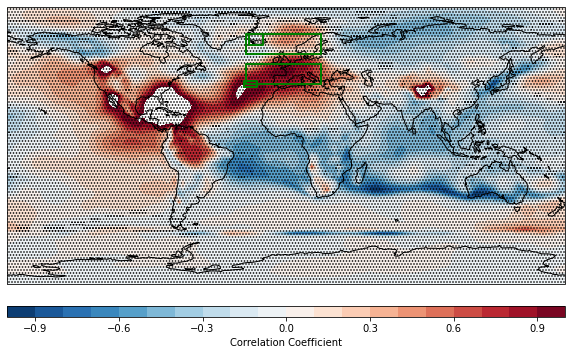

In [8]:
# TODO: plot the mult-model differences in spatial correlations
plt_fnc.plot_correlations(dic.models, rfield_diff, sign_regions, obs, variable,
                            region, season, forecast_range, dic.plots_dir,
                                obs_lons_converted, lons_converted, dic.azores_grid,
                                    dic.iceland_grid, dic.uk_n_box, dic.uk_s_box, experiment='differences',
                                        observed_data=observed_data, ensemble_members_count=None)

In [ ]:
# TODO: plot the spatial correlation differences for each model
